# Class 4: Changing dataframe shape

&nbsp;  
In this class, we'll be looking at three additional tools for tidying your data - **transposing**, **melting** and **casting**. Transposing rotates the data so that rows become columns and vice versa. Melting converts a dataframe from wide to long format, and casting is the reverse. You'll be able to practice these techniques using a couple of different datasets.

## Load the modules

First, let's import pandas and seaborn.

In [1]:
import pandas as pd
import seaborn as sns

## Transposing

&nbsp;  
<div>
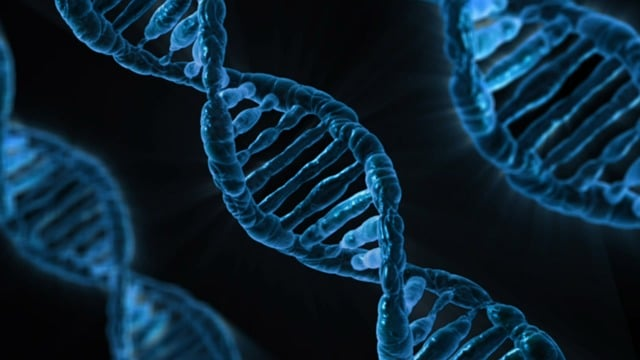
</div>
&nbsp;  

Start by loading in Infection_TPM.csv from the Datasets folder. This dataset includes transcripts per million (a measure of gene expression) of 7 genes. Call it df.

In [2]:
df = pd.read_csv('../Datasets/Infection_TPM.csv')

Now look at the top 5 rows of the dataset.

In [3]:
df.head()

,Gene_ID,Control_Flower,Infected_Flower,Control_leaf,Infected_leaf
0,NLR_1,34,45,20,23
1,NLR_2,1,33,3,56
2,JA_34,3,321,15,543
3,JA_13,5,45,3,22
4,JA_5,21,34,31,67


To transpose the data, you can simply use `df = df.T`. Type this into the cell below and then check the dataset to see what it looks like.

In [4]:
df = df.T
df.head()

,0,1,2,3,4,5,6
Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Infected_Flower,45,33,321,45,34,72,23
Control_leaf,20,3,15,3,31,7,2
Infected_leaf,23,56,543,22,67,21,19


You can see that our columns have become rows and our rows have become columns. The index is now the column headers and the column headers are now the index. For this dataset, it would make sense to make the first row the column headers. So let's define our new column headers and then drop the first row.

In [5]:
col_names = ['NLR_1', 'NLR_2', 'JA_34', 'JA_13', 'JA_5', 'Aux_3', 'Aux_4']
df.columns = col_names
df = df.drop('Gene_ID')
df

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Infected_Flower,45,33,321,45,34,72,23
Control_leaf,20,3,15,3,31,7,2
Infected_leaf,23,56,543,22,67,21,19


What happens if we want to analyse the differences between 'infected' and 'control' plants? Ideally, we would make two new columns - one for tissue (flower / leaf) and one for disease (infected / control). You may remember we did something similar in the last class by splitting strings. This time, however, it is the **index** that combines both pieces of information.

Let's first make the index a column. We can do this using the `df.reset_index()` function. We can include `inplace = True` to make sure this happens on the original dataframe.

In [6]:
df.reset_index(inplace = True)

In [7]:
df

,index,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
0,Control_Flower,34,1,3,5,21,4,6
1,Infected_Flower,45,33,321,45,34,72,23
2,Control_leaf,20,3,15,3,31,7,2
3,Infected_leaf,23,56,543,22,67,21,19


This function creates a new column called 'index'. (Note: you can add `drop = True` into the df.reset_index function and the new 'index' column will be dropped). We can now split this 'index' column to make two new columns.

In [8]:
df[['Disease', 'Tissue']] = df['index'].str.split('_', expand = True)

In [9]:
df

,index,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4,Disease,Tissue
0,Control_Flower,34,1,3,5,21,4,6,Control,Flower
1,Infected_Flower,45,33,321,45,34,72,23,Infected,Flower
2,Control_leaf,20,3,15,3,31,7,2,Control,leaf
3,Infected_leaf,23,56,543,22,67,21,19,Infected,leaf


Write some code to drop the 'index' column as we dont need it anymore. Then check to see everything has worked as expected.

In [10]:
df = df.drop(columns = 'index')
df

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4,Disease,Tissue
0,34,1,3,5,21,4,6,Control,Flower
1,45,33,321,45,34,72,23,Infected,Flower
2,20,3,15,3,31,7,2,Control,leaf
3,23,56,543,22,67,21,19,Infected,leaf


Now that we have separated 'Disease' and 'Tissue', we can analyse these variables separately. For example, we might want to look at the differences in gene expression between Tissues:

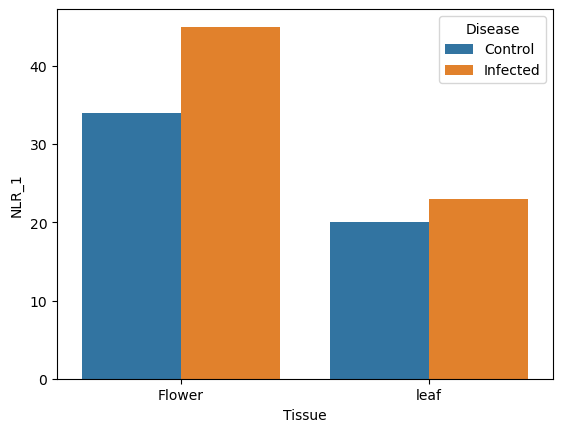

In [11]:
sns.barplot(x = 'Tissue', y = 'NLR_1', hue = 'Disease', data = df);

## Melting

How could we tidy these data further? At the moment, all of our TPM values are distributed over the first 6 columns. However, it is often useful to have all our measured values in a single column. We call this converting from 'wide form' to 'long form'. For our dataset, this would mean we would end up with four columns: Gene_ID, Disease, Tissue and TPM.

To do this, we can use the function `pd.melt`. This takes the form `pd.melt(dataframe, id_vars, value_vars, var_name, value_name...)`.

- `id_vars` are the identifier variables. These are the variables (or columns) that do not contain our values. In our case, these are Disease and Tissue.
- `value_vars` are the variables (or columns) that contain our values. In our case, these are NLR_1, NLR_2, JA_34, JA_13, JA_5, Aux_3 and Aux_4.
- `var_name` is the name we want to assign to our variable column. In this case, we shall call it 'Gene_ID'.
- `value_name` is the name we want to assign to our column of values. In this case, we shall call in 'TPM'.

Let's try it...

In [12]:
df_melt = pd.melt (df, id_vars = ['Disease', 'Tissue'], 
                   value_vars = ['NLR_1', 'NLR_2', 'JA_34', 'JA_13', 'JA_5', 'Aux_3', 'Aux_4'],
                   var_name = 'Gene_ID', value_name = 'TPM')

In [13]:
df_melt.head()

,Disease,Tissue,Gene_ID,TPM
0,Control,Flower,NLR_1,34
1,Infected,Flower,NLR_1,45
2,Control,leaf,NLR_1,20
3,Infected,leaf,NLR_1,23
4,Control,Flower,NLR_2,1


Having data in long form like this makes it easier to perform various analyses. For example, we can now plot a similar graph to the one above but incorporating data from all the genes this time.

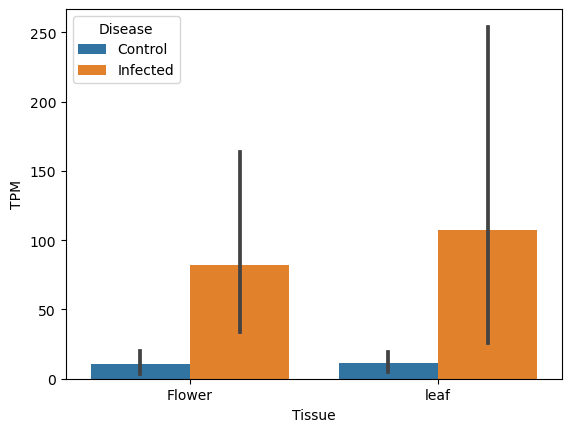

In [14]:
sns.barplot(x = 'Tissue', y = 'TPM', hue = 'Disease', data = df_melt);

Or we can break it down by gene...

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


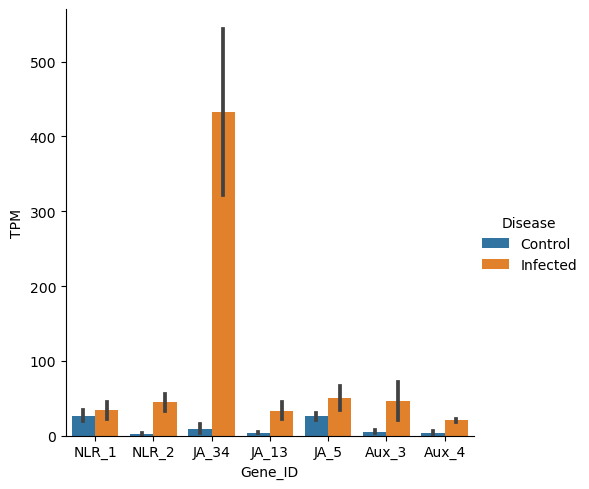

In [15]:
sns.catplot(x = 'Gene_ID', y = 'TPM', hue = 'Disease', data = df_melt, kind = 'bar');

Or we can look at the different 'tissues' separately...

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


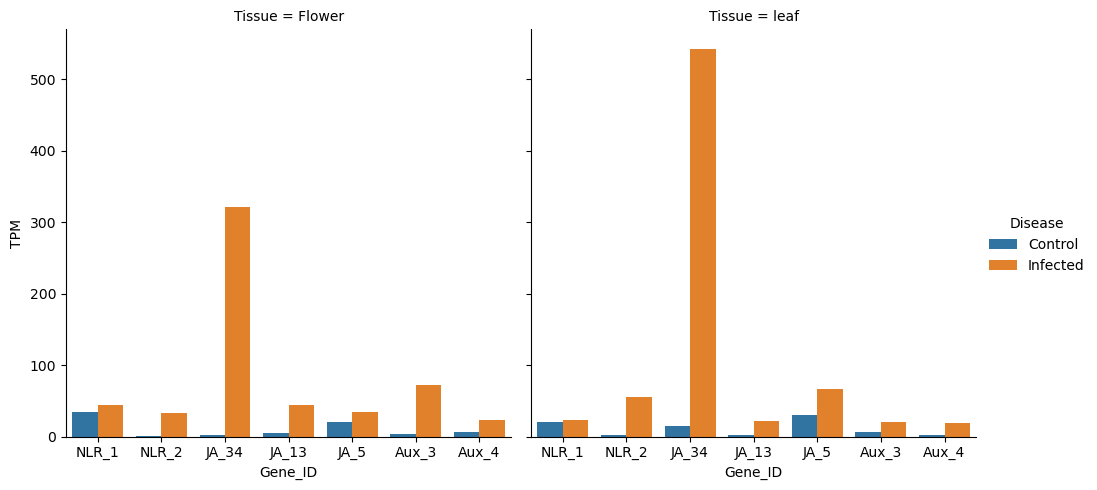

In [16]:
sns.catplot(x = 'Gene_ID', y = 'TPM', hue = 'Disease', data = df_melt, col = 'Tissue', kind = 'bar');

## Casting

Casting is the reverse of melting i.e. it converts long form data into wide form. We can do this using the `pd.pivot` function. This takes the form `pd.pivot(dataframe, columns, index, values...)`.

- `columns` is the column that we want to use to make the new dataframe's columns. In this case, it is Gene_ID.
- `index` is the column(s) that we want to use to make the new dataframe’s index. Let's do this with 'Tissue' and 'Disease'.
- `values` is the column containing our values. In this case, it is TPM.

In [17]:
df_cast = pd.pivot(df_melt, columns = 'Gene_ID', index = ['Tissue', 'Disease'], values = 'TPM')
df_cast

Gene_ID         Aux_3 Aux_4 JA_13 JA_34 JA_5 NLR_1 NLR_2
Tissue Disease                                          
Flower Control      4     6     5     3   21    34     1
       Infected    72    23    45   321   34    45    33
leaf   Control      7     2     3    15   31    20     3
       Infected    21    19    22   543   67    23    56

You might have noticed that we now have a multi-level index. We can reset 'Tissue' and 'Disease' to columns using `reset_index(inplace = True)`.

In [18]:
df_cast.reset_index(inplace = True)
df_cast

Gene_ID,Tissue,Disease,Aux_3,Aux_4,JA_13,JA_34,JA_5,NLR_1,NLR_2
0,Flower,Control,4,6,5,3,21,34,1
1,Flower,Infected,72,23,45,321,34,45,33
2,leaf,Control,7,2,3,15,31,20,3
3,leaf,Infected,21,19,22,543,67,23,56


## Some more practice (and a bit of revision)

Let's look at a few more datasets now. These will give you a bit more practice using some of the functions you have learned over the last few classes. These are tricky, and we are deliberately providing only sparse instructions so that you can challenge yourself. Work together, and remember to ask the demonstrators for help if you need.

First, read in Greenland_nests.csv from the Datasets folder. Then look at the dataset to make sure it has loaded correctly.

In [19]:
df = pd.read_csv('../Datasets/Greenland_nests.csv')

In [20]:
df

,Nesting Site,0 chicks,1 chick,2 chicks,3 chicks,>3 chicks,Nests assessed
0,Qaanaq,0.21,0.00,0.57,0.22,0.00,356
1,Sisimiut,0.00,0.34,0.65,0.01,0.00,523
2,Maniitsoq,0.00,0.22,0.56,0.17,0.05,2113
3,Tasiilaq,0.34,0.45,0.12,0.09,0.00,67
4,Ittoqqortoormiit,0.44,0.25,0.31,0.00,0.00,266
5,Nuuk,0.02,0.57,0.23,0.13,0.05,734
6,Disko Bay,0.11,0.42,0.24,0.23,0.00,225


This dataset includes information on nesting sites, the number of nests assessed at each site, and the number of chicks found in each nest (calculated as a frequency across five different levels).

Now try melting this dataset into long form. Call your variable name 'No_chicks' and your value name 'Frequency'. Hint: your values are contained within the '0 chicks', '1 chick', '2 chicks', '3 chicks ' and '>3 chicks' columns.

In [21]:
df_melt = pd.melt(df, id_vars = ['Nesting Site', 'Nests assessed'],
                  value_vars = ['0 chicks', '1 chick', '2 chicks', '3 chicks ', '>3 chicks'], # note the space in '3 chicks '
                  var_name = 'No_chicks',
                  value_name = 'Frequency')

In [22]:
df_melt

,Nesting Site,Nests assessed,No_chicks,Frequency
0,Qaanaq,356,0 chicks,0.21
1,Sisimiut,523,0 chicks,0.00
2,Maniitsoq,2113,0 chicks,0.00
3,Tasiilaq,67,0 chicks,0.34
4,Ittoqqortoormiit,266,0 chicks,0.44
5,Nuuk,734,0 chicks,0.02
6,Disko Bay,225,0 chicks,0.11
7,Qaanaq,356,1 chick,0.00
8,Sisimiut,523,1 chick,0.34
9,Maniitsoq,2113,1 chick,0.22


Now have a go plotting these data using the following code `sns.stripplot(x = 'No_chicks', y = 'Frequency', hue = 'Nesting Site', data = df_melt);`. You might need to edit this depending on what you called your dataframe.

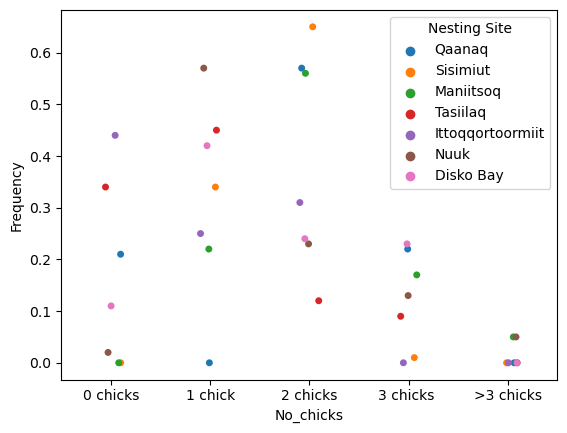

In [23]:
sns.stripplot(x = 'No_chicks', y = 'Frequency', hue = 'Nesting Site', data = df_melt);

Now read in the B_conch_loc.csv file from the Datasets folder. Check to make sure it has loaded correctly.

In [24]:
df = pd.read_csv('../Datasets/B_conch_loc.csv')

In [25]:
df.head()

,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. Chiang Cabrera",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
0,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
1,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
2,Begonia conchifolia,Costa Rica,Cartago,"9.588293, -85.296503","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
3,Begonia conchifolia,Costa Rica,Guanacaste,"9.629001, -84.929014","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
4,Begonia conchifolia,Costa Rica,Heredia,"10.113520, -85.166314","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131


&nbsp;  
<div>
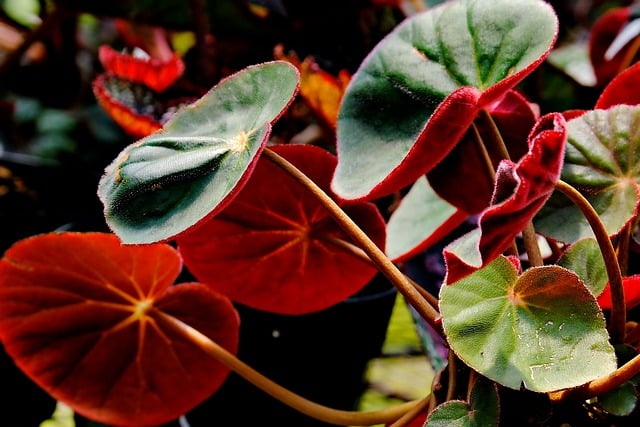
</div>
&nbsp;  

This dataset contains location information for the plant *Begonia conchifolia*. Unfortunately, it hasn't loaded in correctly as the first row has been used as the column headers. Try again, this time including `header = None` in your code. Then use `df.head()` to see what it looks like.

In [26]:
df = pd.read_csv('../Datasets/B_conch_loc.csv', header = None)

In [27]:
df.head()

,0,1,2,3,4,5,6,7,8
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347"
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
3,Begonia conchifolia,Costa Rica,Cartago,"9.588293, -85.296503","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131
4,Begonia conchifolia,Costa Rica,Guanacaste,"9.629001, -84.929014","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131


Check the data types of each variable.

In [28]:
df.dtypes

0    object
1    object
2    object
3    object
4    object
5     int64
6    object
7    object
8    object
dtype: object

Now let's try and tidy it up a little. First, make a new column called 'Reference' which concatenates all the information from columns 4 - 8. Remember, you will need to use the code `.astype(str)` if the variables are not coded as strings.

In [29]:
df['Reference'] = df[4].astype(str) + '_' + df[5].astype(str) + '_' + df[6].astype(str) + '_' + df[7].astype(str) + '_' + df[8].astype(str)
df.head()

,0,1,2,3,4,5,6,7,8,Reference
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C..."
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",2015,Saururaceae a Zygophyllaceae,Fl. Mesoamer.,"2(3): v–xvii, 1–347","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C..."
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131,"Burt-Utley, K._1985_A revision of Central Amer..."
3,Begonia conchifolia,Costa Rica,Cartago,"9.588293, -85.296503","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131,"Burt-Utley, K._1985_A revision of Central Amer..."
4,Begonia conchifolia,Costa Rica,Guanacaste,"9.629001, -84.929014","Burt-Utley, K.",1985,A revision of Central American species of Bego...,Tulane Stud. Zool. Bot.,25(1): 1–131,"Burt-Utley, K._1985_A revision of Central Amer..."


Now drop columns 4 - 8 as we don't need them any more.

In [30]:
df = df.drop(columns = [4, 5, 6, 7, 8])
df.head()

,0,1,2,3,Reference
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C..."
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C..."
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K._1985_A revision of Central Amer..."
3,Begonia conchifolia,Costa Rica,Cartago,"9.588293, -85.296503","Burt-Utley, K._1985_A revision of Central Amer..."
4,Begonia conchifolia,Costa Rica,Guanacaste,"9.629001, -84.929014","Burt-Utley, K._1985_A revision of Central Amer..."


Now let's split column 3 into longitude and latitude. Use `str.split` to split this column and form two new columns called Longitude and Latitude. Note that the separator is ', ' this time.

In [31]:
df[['Longitude', 'Latitude']] = df[3].str.split(', ', expand = True)
df.head()

,0,1,2,3,Reference,Longitude,Latitude
0,Begonia conchifolia,Costa Rica,Liberia,"10.630573, -85.439346","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",10.630573,-85.439346
1,Begonia conchifolia,Costa Rica,San José,"9.934739, -84.087502","Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",9.934739,-84.087502
2,Begonia conchifolia,Costa Rica,Alajuela,"10.582930, -84.261923","Burt-Utley, K._1985_A revision of Central Amer...",10.582930,-84.261923
3,Begonia conchifolia,Costa Rica,Cartago,"9.588293, -85.296503","Burt-Utley, K._1985_A revision of Central Amer...",9.588293,-85.296503
4,Begonia conchifolia,Costa Rica,Guanacaste,"9.629001, -84.929014","Burt-Utley, K._1985_A revision of Central Amer...",9.629001,-84.929014


Now drop column 3.

In [32]:
df = df.drop(columns = 3)
df.head()

,0,1,2,Reference,Longitude,Latitude
0,Begonia conchifolia,Costa Rica,Liberia,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",10.630573,-85.439346
1,Begonia conchifolia,Costa Rica,San José,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",9.934739,-84.087502
2,Begonia conchifolia,Costa Rica,Alajuela,"Burt-Utley, K._1985_A revision of Central Amer...",10.582930,-84.261923
3,Begonia conchifolia,Costa Rica,Cartago,"Burt-Utley, K._1985_A revision of Central Amer...",9.588293,-85.296503
4,Begonia conchifolia,Costa Rica,Guanacaste,"Burt-Utley, K._1985_A revision of Central Amer...",9.629001,-84.929014


And finally, rename the columns using `['Species_name', 'Country', 'Location', 'Reference', 'Longitude', 'Latitude']`.

In [33]:
df.columns = ['Species_name', 'Country', 'Location', 'Reference', 'Longitude', 'Latitude']
df.head()

,Species_name,Country,Location,Reference,Longitude,Latitude
0,Begonia conchifolia,Costa Rica,Liberia,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",10.630573,-85.439346
1,Begonia conchifolia,Costa Rica,San José,"Davidse, G., M. Sousa Sánchez, S. Knapp & F. C...",9.934739,-84.087502
2,Begonia conchifolia,Costa Rica,Alajuela,"Burt-Utley, K._1985_A revision of Central Amer...",10.582930,-84.261923
3,Begonia conchifolia,Costa Rica,Cartago,"Burt-Utley, K._1985_A revision of Central Amer...",9.588293,-85.296503
4,Begonia conchifolia,Costa Rica,Guanacaste,"Burt-Utley, K._1985_A revision of Central Amer...",9.629001,-84.929014


Now you can stand back and admire your lovely tidy dataset!

One final bit of practice... Read in the Leaves.csv file in the Datasets folder and check things look OK.

In [34]:
df = pd.read_csv('../Datasets/Leaves.csv')

In [35]:
df.head()

,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,1,2,Adaxial
1,NaN,NaN,NaN,NaN,NaN,2,1,3,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,2,1,1,Adaxial
3,NaN,NaN,NaN,NaN,NaN,3,2,3,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,1,1,2,Adaxial


This dataset includes counts of hairs on the abaxial (underside) and adaxial (upperside) of three leaves per plant (columns '1', '2' and '3'), along with the expression pattern for three genes (ADH1, SSC2 and SSC3) and the genotype of each plant.

You can see that the data are in a horrible format! There are really 6 readings per plant (3 adaxial and 3 abaxial) but these have been split across 2 rows. This has generated a large number of NaNs.

Let's deal with this first. We can use a function called `df.fillna` to fill these NaNs with something more meaningful. In our case, it makes sense to simply copy the information from the row above. We can do this using `df.fillna(method = 'ffill', inplace = True)`. Type this in to the cell below and have another look at your dataframe to see what it has done.

In [36]:
df.fillna(method = 'ffill', inplace = True)
df.head()

,Plant,Genotype,ADH1,SSC2,SSC3,1,2,3,Side
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,1,1,2,Adaxial
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,2,1,3,Abaxial
2,MK_560_2,ddm1/+,223.0,43.0,14.0,2,1,1,Adaxial
3,MK_560_2,ddm1/+,223.0,43.0,14.0,3,2,3,Abaxial
4,MK_560_3,wt,432.0,12.0,67.0,1,1,2,Adaxial


Now have a go melting your dataset into long form. Our identifier variables will be 'Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3' and 'Side'. Our values (or observations) are contained in the columns '1', '2' and '3'. Call your variable name 'Sample' and your value name 'Count'.

In [37]:
df_melt = pd.melt(df, id_vars = ['Plant', 'Genotype', 'ADH1', 'SSC2', 'SSC3', 'Side'],
                  value_vars = ['1', '2', '3'], var_name = 'Sample', value_name = 'Count')
df_melt

,Plant,Genotype,ADH1,SSC2,SSC3,Side,Sample,Count
0,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Adaxial,1,1
1,MK_560_1,ddm1/ddm1,432.0,12.0,67.0,Abaxial,1,2
2,MK_560_2,ddm1/+,223.0,43.0,14.0,Adaxial,1,2
3,MK_560_2,ddm1/+,223.0,43.0,14.0,Abaxial,1,3
4,MK_560_3,wt,432.0,12.0,67.0,Adaxial,1,1
5,MK_560_3,wt,432.0,12.0,67.0,Abaxial,1,3
6,MK_560_4,ddm1/+,189.0,37.0,10.0,Adaxial,1,2
7,MK_560_4,ddm1/+,189.0,37.0,10.0,Abaxial,1,1
8,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Adaxial,1,1
9,MK_560_5,ddm1/ddm1,543.0,8.0,53.0,Abaxial,1,3


And finally, use the following code to show the difference in hair counts between the adaxial and abaxial sides of the leaf for the different genotypes: `sns.catplot(x = 'Genotype', y = 'Count', hue = 'Side', data = df_melt, kind = 'bar');`.

/opt/conda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


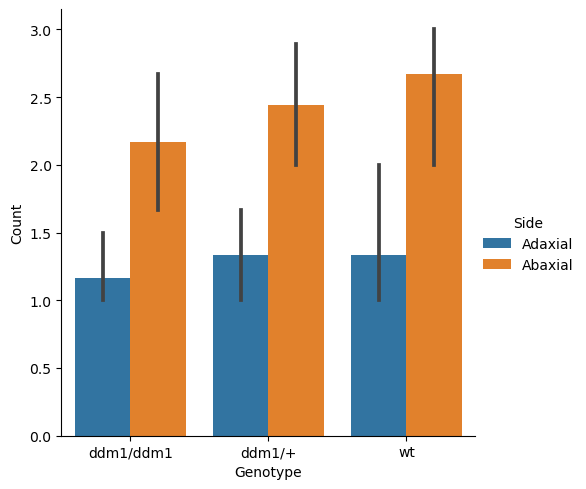

In [38]:
sns.catplot(x = 'Genotype', y = 'Count', hue = 'Side', data = df_melt, kind = 'bar');

## If you have time in class, or for homework...

Spend some time this week going over all the material we have covered so far. Are there any functions that you don't understand? Have a go playing with these on some other datasets. And if you haven't already, start putting together your own cheat sheet of useful functions.